In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
# iris = datasets.load_iris()
# X = iris.data[:, :2]
# y = (iris.target != 0) * 1
# plt.figure(figsize=(10, 6))
# plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
# plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
# plt.legend();

In [4]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

サポートベクトルマシンの実装：
---
参考になりそうな文献：
確率的勾配降下法によるSVMの実装
https://qiita.com/sz_dr/items/763239df283c7e96be99

サポートベクターマシンを実際に試してみる:
http://darden.hatenablog.com/entry/2016/09/06/213109


サポートベクトルマシンにおける最小化すべき目的関数
$$$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$$
制約条件
$$
k(x_i, x_j) = x_{i}^{T} x_j
$$

- ①カーネル関数の関数
- ②ラグランジュ乗数の関数
- lamda(i)は更新したラムダが入る部分
- lamda(j)は０００００
- αは学習率
- 計算は行列の計算を用いて行う。

In [5]:
def karnel():
    np.doc(x)

In [6]:
#小川さんの式

# self.h = np.sum(self.lamda*y*y.T*self._linear(X),axis=1)

# self.lamda += self.lr*(1-self.h)


# yy = y@y.T
# kx = self._kernel_function(X, X) 
# yykx = yy * kx
# sigma = lmd.T @ yykx  
# lmd = lmd + self.lr * (1- sigma.T)   
# lmd = np.where(lmd <  0, 0, lmd)

DIVEから来ている雛形

【問題1】ラグランジュの未定乗数法による最急降下
---
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 𝜆 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$

In [7]:
xi = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])

In [8]:
xi

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [9]:
yi = np.array([1,-1,1,-1,1,])

In [10]:
yi

array([ 1, -1,  1, -1,  1])

In [11]:
lamda_i = np.zeros(len(y))

In [12]:
lamda_i

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
alpha = 0.01
k = X@X.T
print(k)
type(k)

[[ 5.84834156 -4.28053661 -2.72096008 ... -4.85507427 -3.09411122
   2.10896519]
 [-4.28053661  3.13389846  2.0451221  ...  3.5236277   2.29431684
  -1.5693301 ]
 [-2.72096008  2.0451221   4.54941793 ...  0.42596695  3.2571986
  -2.55771625]
 ...
 [-4.85507427  3.5236277   0.42596695 ...  5.05362835  1.55398335
  -0.87075868]
 [-3.09411122  2.29431684  3.2571986  ...  1.55398335  2.64317102
  -1.98848275]
 [ 2.10896519 -1.5693301  -2.55771625 ... -0.87075868 -1.98848275
   1.51745052]]


numpy.ndarray

In [14]:
yiyj = y*y.reshape(len(y),1)
print(yiyj)
type(yiyj) #１列の転置ができない

[[ 1 -1 -1 ... -1 -1  1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [ 1 -1 -1 ... -1 -1  1]]


numpy.ndarray

In [15]:
yiyj_k = yiyj*k
print(yiyj_k)

[[5.84834156 4.28053661 2.72096008 ... 4.85507427 3.09411122 2.10896519]
 [4.28053661 3.13389846 2.0451221  ... 3.5236277  2.29431684 1.5693301 ]
 [2.72096008 2.0451221  4.54941793 ... 0.42596695 3.2571986  2.55771625]
 ...
 [4.85507427 3.5236277  0.42596695 ... 5.05362835 1.55398335 0.87075868]
 [3.09411122 2.29431684 3.2571986  ... 1.55398335 2.64317102 1.98848275]
 [2.10896519 1.5693301  2.55771625 ... 0.87075868 1.98848275 1.51745052]]


In [16]:
lamda_yiyj_k = lamda_i.T*yiyj*k
print(lamda_yiyj_k)
print(lamda_yiyj_k.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(500, 500)


In [168]:
dot_sum_lamda_yiyj_k = np.sum(lamda_yiyj_k,axis=1)
print(dot_sum_lamda_yiyj_k)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [169]:
one_dot_sum_lamda_yiyj_k = 1-dot_sum_lamda_yiyj_k
print(one_dot_sum_lamda_yiyj_k)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [170]:
alpha = 0.01
type(alpha)
lamda_new = lamda_i + alpha*one_dot_sum_lamda_yiyj_k
print(lamda_new)
print(lamda_new.shape)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 

問２、サポートベクトルの決定
---

In [171]:
#インデックスの取得
lamda_sv = np.where(lamda_new>0.0001)
print(lamda_sv)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [172]:
#取得したインデックスを元にxiの値を取得
lamda_x_s = X[lamda_sv]
print(lamda_x_s)

[[ 7.72382751e-01 -2.29167329e+00]
 [-5.93349449e-01  1.66788336e+00]
 [-2.07648560e+00  4.87468451e-01]
 [ 1.19226877e-01  3.62537974e+00]
 [-3.13000578e+00 -1.56731551e-01]
 [-1.78109832e+00  1.22224904e+00]
 [ 3.99770982e+00  1.25164011e+00]
 [ 2.15604470e+00 -3.85824429e-01]
 [ 1.94741552e+00 -1.29638961e+00]
 [ 1.58757396e+00 -1.85989193e+00]
 [ 2.05369045e+00 -9.47185530e-01]
 [-1.97439392e+00  1.22718715e+00]
 [-3.47487306e+00  3.70421433e-01]
 [ 1.68094977e+00 -6.36507554e-01]
 [-9.51997101e-01  1.41989638e+00]
 [-1.23054341e+00  2.48848983e+00]
 [-6.96789478e-01  1.88359001e+00]
 [ 1.03842491e+00 -8.88815671e-01]
 [ 3.68706491e+00  4.30242556e-01]
 [-1.03002856e+00  1.27865865e+00]
 [-1.26658152e+00  1.97258945e+00]
 [-1.97638843e-02  2.54412654e+00]
 [ 8.60592217e-01 -2.46186096e+00]
 [ 1.18894987e+00 -8.80504418e-01]
 [-1.87575023e+00  1.56364771e+00]
 [ 2.46165485e+00 -2.00601784e+00]
 [-1.59848154e+00  1.10652913e+00]
 [ 3.98744618e+00 -1.36849117e-01]
 [-9.99508672e-01  2

In [173]:
#取得したインデックスを元にYiの値を取得
lamda_y_s=y[lamda_sv]
print(lamda_y_s)

[-1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1
  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1
  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1
  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1
  1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1
 -1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1
  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1
  1  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1
 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1  1  1
  1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1

問３
----
$$
f(x) = \sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n)
$$
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた 𝑓(𝑥) の符号が分類結果です。

In [175]:
#k(x. sn)の計算
k_sn = lamda_x_s@X.T
print(lamda_x_s.shape)
print(k_sn)
print(k_sn.shape)

(500, 2)
[[ 5.84834156 -4.28053661 -2.72096008 ... -4.85507427 -3.09411122
   2.10896519]
 [-4.28053661  3.13389846  2.0451221  ...  3.5236277   2.29431684
  -1.5693301 ]
 [-2.72096008  2.0451221   4.54941793 ...  0.42596695  3.2571986
  -2.55771625]
 ...
 [-4.85507427  3.5236277   0.42596695 ...  5.05362835  1.55398335
  -0.87075868]
 [-3.09411122  2.29431684  3.2571986  ...  1.55398335  2.64317102
  -1.98848275]
 [ 2.10896519 -1.5693301  -2.55771625 ... -0.87075868 -1.98848275
   1.51745052]]
(500, 500)


In [186]:
lamda_i = np.zeros(len(1))

TypeError: object of type 'int' has no len()

In [182]:
#lamdanとYsv-nの部分を計算
lamda_x_s_y_s = lamda_i*lamda_y_s
print(lamda_x_s_y_s)

[-0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.
 -0.  0.  0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.  0.
  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0.  0.
  0. -0.  0.  0.  0. -0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.
 -0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0.  0.  0. -0. -0.
  0. -0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0. -0.
 -0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0.
  0.  0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0.  0.
  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0.
 -0.  0. -0. -0.  0. -0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.
 -0. -0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.
 -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0

In [184]:
#これまでの計算にシグマでnp.sumを行う
fx = np.sum(lamda_x_s_y_s@k_sn, axis=1)
print(fx)

AxisError: axis 1 is out of bounds for array of dimension 1

In [151]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lamda_x_s = np.empty(0)
        self.lamda_y_s = np.empty(0)
    def fit(self, Xi, yi, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        lamda_i = np.random.rand(len(yi))
        for i in range(self.iter):
            #ラングジュアル乗数を実施
            k = Xi@Xi.T #kleanの計算
            yiyj = yi*yi.reshape(len(yi),1) #yのアダマール積で一気に計算
            yiyj_k = yiyj*k #klearnのアダマール積
            lamda_yiyj_k = lamda_i.T*yiyj_k #ラムダのとのアダマール積
            dot_sum_lamda_yiyj_k = np.sum(lamda_yiyj_k,axis=1)#値を圧縮して列の値を求める
            one_dot_sum_lamda_yiyj_k = 1-dot_sum_lamda_yiyj_k #sumから1を引く
            lamda_i = lamda_i+self.lr*one_dot_sum_lamda_yiyj_k
            lamda_i = np.where(lamda_i<0, 0,lamda_i)

        #サポートベクターの決定
        lamda_sv = np.where(lamda_i>self.threshold)
        self.sv = lamda_i[lamda_sv].reshape(-1,1)
        self.sv.shape
        
        #取得したインデックスを元にxiの値を取得
        self.lamda_x_s = Xi[lamda_sv]
        #取得したインデックスを元にYiの値を取得
        self.lamda_y_s=yi[lamda_sv].reshape(-1,1)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
         #推定
        #k(x. sn)の計算
        self.k_sn = self.lamda_x_s@X.T
        print(self.k_sn.shape)
        #lamdanとYsv-nの部分を計算
        lamda_sv_y_s = self.sv*self.lamda_y_s
        print(lamda_sv_y_s.shape)
        #これまでの計算にシグマでnp.sumを行う
        fx = np.sum(lamda_sv_y_s.T@self.k_sn, axis=0)
        fx = np.sign(fx)
        print(fx.shape)
        print(fx)
        return fx

In [152]:
SVM = ScratchSVMClassifier(num_iter=100, lr=0.001)

In [153]:
SVM.fit(X,y)

In [154]:
print(SVM.sv)
SVM.sv.shape

[[1.36284394e-01]
 [1.14466131e-01]
 [1.60896866e-04]
 [1.83892798e-01]
 [1.33962101e-01]
 [9.26558267e-03]
 [2.27411387e-01]
 [5.63726001e-04]
 [3.56011523e-03]
 [9.10431099e-02]]


(10, 1)

In [155]:
y_pred_scratch = SVM.predict(X)

(10, 500)
(10, 1)
(500,)
[-1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.
 -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.
  1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.
  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
 -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.
 -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1. -1.  1. -1.  

【問題4】学習と推定
---
>機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [157]:
SVM.fit(X_train,y_train)

In [158]:
y_pred_scratch = SVM.predict(X_test)
type(y_pred_scratch)
# y_pred_scratch = y_pred_scratch.reshape(-1,1).T

(7, 125)
(7, 1)
(125,)
[-1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.
  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.
 -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.]


numpy.ndarray

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_scratch))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_scratch))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_scratch))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_scratch))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_scratch))

confusion matrix = 
 [[62  0]
 [ 0 63]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


In [160]:
from sklearn.svm import SVC
ｓｖm_model = SVC(gamma='scale')
ｓｖm_model.fit(X_train.round().astype(int), y_train.round().astype(int))
y_pred_svm = ｓｖm_model.predict(X_test.round().astype(int))

In [161]:
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_svm))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_svm))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_svm))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_svm))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_svm))

confusion matrix = 
 [[62  0]
 [ 0 63]]
accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


(7, 2500)
(7, 1)
(2500,)
[-1. -1. -1. ...  1.  1.  1.]


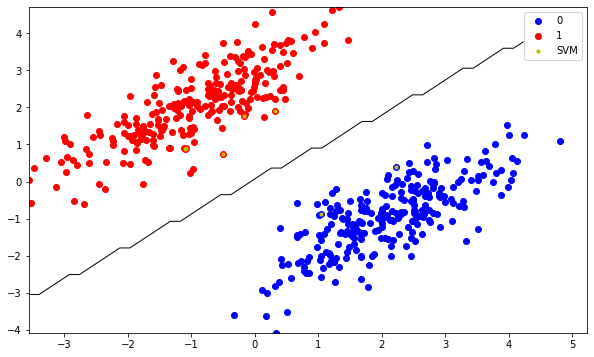

In [163]:
#プロット関係のインポート
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.scatter(SVM.lamda_x_s[:, 0], SVM.lamda_x_s[:, 1], color='y', label='SVM', s=10)
# plt.scatter(SV[:,0], SV[:,0], c='black', linewidths=1.0, edgecolors='red')

plt.legend()
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max(),
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = SVM.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');